In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4481 - loss: 1.7364 - val_accuracy: 0.7278 - val_loss: 0.7839
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7508 - loss: 0.7253 - val_accuracy: 0.7939 - val_loss: 0.6182
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8044 - loss: 0.5862 - val_accuracy: 0.8132 - val_loss: 0.5518
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8188 - loss: 0.5343 - val_accuracy: 0.8299 - val_loss: 0.5098
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8332 - loss: 0.4985 - val_accuracy: 0.8355 - val_loss: 0.4900
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8430 - loss: 0.4681 - val_accuracy: 0.8391 - val_loss: 0.4734
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8454 - loss: 0.4584 - val_accuracy: 0.8419 - val_loss: 0.4594
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8548 - loss: 0.4326 - val_accuracy: 0.8460 - val_loss

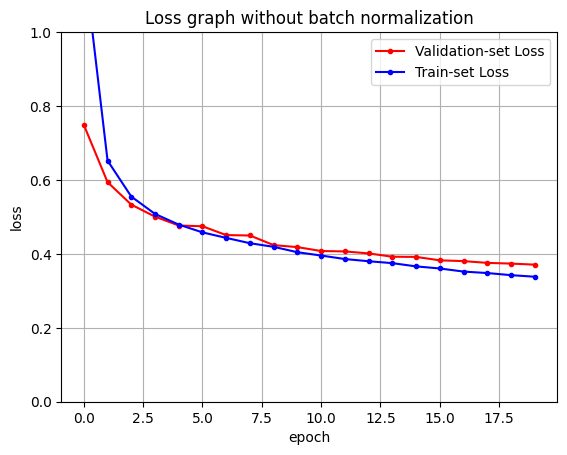

In [4]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

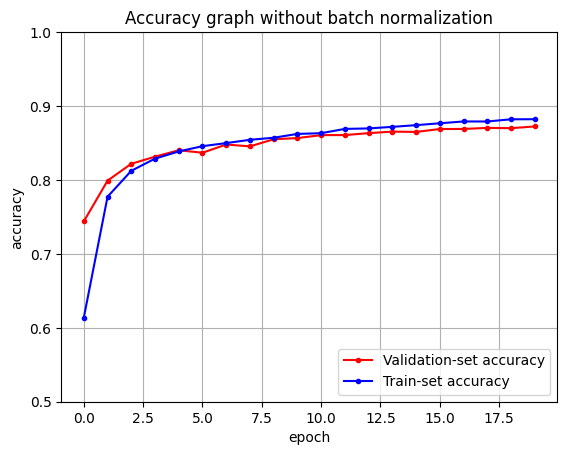

In [5]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Batch Normalization layer


In [ ]:
# Q. 두 개의 dense layer 사이에 batch normalization layer를 추가하는 코드입니다.

model = keras.Sequential([
    # [[YOUR CODE]]
    # 여기에 batch normalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
   
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

# [[YOUR CODE]]
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5233 - loss: 1.3775 - val_accuracy: 0.5465 - val_loss: 1.2649
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8026 - loss: 0.5823 - val_accuracy: 0.6978 - val_loss: 0.9520
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8342 - loss: 0.4893 - val_accuracy: 0.7848 - val_loss: 0.7421
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8494 - loss: 0.4426 - val_accuracy: 0.8364 - val_loss: 0.6306
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8575 - loss: 0.4121 - val_accuracy: 0.8479 - val_loss: 0.5503
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8676 - loss: 0.3846 - val_accuracy: 0.8576 - val_loss: 0.4959
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8754 - loss: 0.3635 - val_accuracy: 0.8581 - val_loss: 0.4766
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8816 - loss: 0.3446 - val_accuracy: 0.8643 - val_l

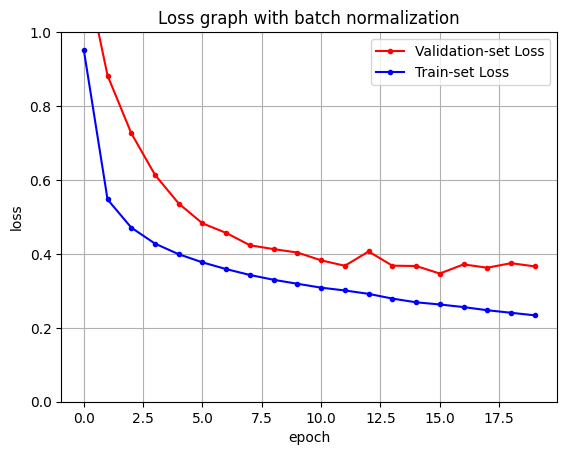

In [13]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

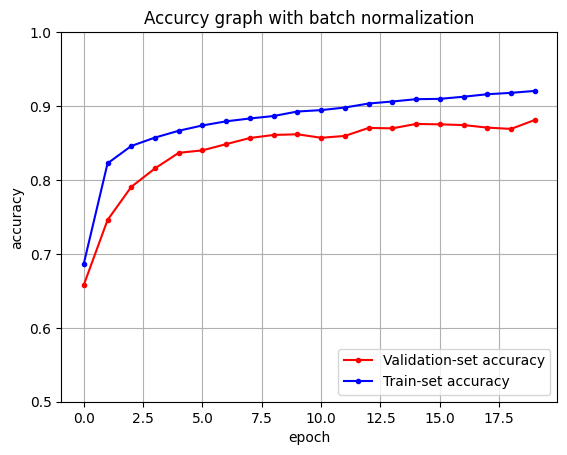

In [11]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()